In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
def perform_adf_test(series):
    result = adfuller(series)
    print("ADF stats:", result[0])
    print("p-value:", result[1])
    print(result)
def test_ar_ts_data(lags, coefs, length):
    coefs = np.array(coefs)

    series = [np.random.normal() for _ in range(lags)]
    for _ in range(length):
        prev_values = series[-lags:][::-1]
        new_value  = np.sum(np.array(prev_values) * coefs) + np.random.normal() 
        series.append(new_value)
    return np.array(series)
# coef sum = 1 => non stationary
series = test_ar_ts_data(2, [.5, .3], 100)
perform_adf_test(series)


ADF stats: -2.788393659043542
p-value: 0.05995087219214737
(-2.788393659043542, 0.05995087219214737, 6, 95, {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}, 281.02327998180584)


In [4]:
import yfinance as yf
import statsmodels.api as sm
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings("ignore")
df = yf.download(["AAPL","NVDA","ON","MCD", "GS", "GM", "F"], start='2022-01-01', progress=False)
close = df['Adj Close']

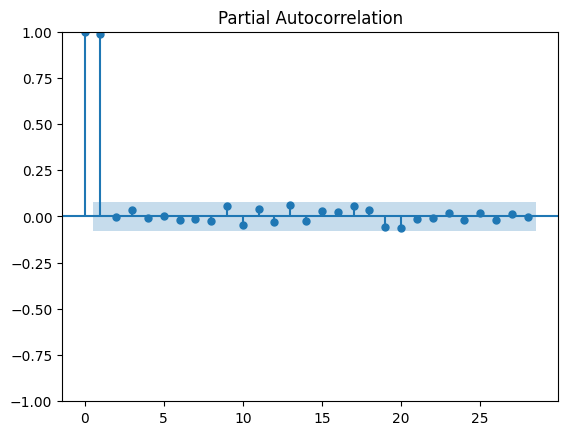

In [45]:
train_end = pd.to_datetime("2023-01-01")
test_end  = pd.to_datetime("2024-01-01")
aapl = close['AAPL']
train_data = aapl[:train_end]
test_data  = aapl[train_end + pd.to_timedelta(1): test_end]
plot_pa = plot_pacf(aapl)-0
model = sm.tsa.arima.ARIMA(train_data, order=(1, 0, 0)) # order = (ar_t, ma_t), for ar model only => ma_t = 0

In [46]:
from time import time
start = time()
model_fit = model.fit()
end = time()
print("fitting time:", end - start)
print(model_fit.summary())

fitting time: 0.13271188735961914
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  251
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -661.643
Date:                Mon, 27 May 2024   AIC                           1329.286
Time:                        03:41:41   BIC                           1339.863
Sample:                             0   HQIC                          1333.542
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.3731      6.368     24.084      0.000     140.891     165.855
ar.L1          0.9746      0.016     62.426      0.000       0.944       1.005
sigma2        11.2

In [50]:
pred_pct_change = model_fit.predict().pct_change().dropna()
train_data_pct_change = train_data.pct_change().dropna()
correct = 0
incorrect = 0
for i in range(len(pred_pct_change)):
    if pred_pct_change[i] > 0 and train_data_pct_change[i] > 0:
        correct += 1
    elif pred_pct_change[i] < 0 and train_data_pct_change[i] < 0:
        correct+=1
    else:
        incorrect += 1
print(correct/(correct+incorrect))

0.508
